In [1]:
import pandas as pd
import numpy as np
import csv
import re
from bs4 import BeautifulSoup
import camelot 

from tabula import read_pdf
from tabulate import tabulate
from itertools import chain
import matplotlib as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# %matplotlib inline
%config InlineBackend.figure_format='retina'
# If encounter SSL certify error - go to your Python 3.x.x folder and install Certification 

In [12]:
csv = pd.read_csv('farm_smoke.csv')
sonoma_data = csv.query('County == "Sonoma" and Year >= 2007').copy().reset_index(drop=True)
sonoma_data

,County,Year,Links
0,Sonoma,2021,https://sonomacounty.ca.gov//Main%20County%20S...
1,Sonoma,2020,https://sonomacounty.ca.gov//Main%20County%20S...
2,Sonoma,2019,https://sonomacounty.ca.gov//Main%20County%20S...
3,Sonoma,2018,https://sonomacounty.ca.gov//Main%20County%20S...
4,Sonoma,2017,https://sonomacounty.ca.gov//Main%20County%20S...
5,Sonoma,2016,https://sonomacounty.ca.gov//Main%20County%20S...
6,Sonoma,2015,https://sonomacounty.ca.gov//Main%20County%20S...
7,Sonoma,2014,https://sonomacounty.ca.gov//Main%20County%20S...
8,Sonoma,2013,https://sonomacounty.ca.gov//Main%20County%20S...
9,Sonoma,2012,https://sonomacounty.ca.gov//Main%20County%20S...


In [13]:
urls = sonoma_data['Links']
urls

0     https://sonomacounty.ca.gov//Main%20County%20S...
1     https://sonomacounty.ca.gov//Main%20County%20S...
2     https://sonomacounty.ca.gov//Main%20County%20S...
3     https://sonomacounty.ca.gov//Main%20County%20S...
4     https://sonomacounty.ca.gov//Main%20County%20S...
5     https://sonomacounty.ca.gov//Main%20County%20S...
6     https://sonomacounty.ca.gov//Main%20County%20S...
7     https://sonomacounty.ca.gov//Main%20County%20S...
8     https://sonomacounty.ca.gov//Main%20County%20S...
9     https://sonomacounty.ca.gov//Main%20County%20S...
10    https://sonomacounty.ca.gov//Main%20County%20S...
11    https://sonomacounty.ca.gov//Main%20County%20S...
12    https://sonomacounty.ca.gov//Main%20County%20S...
13    https://sonomacounty.ca.gov//Main%20County%20S...
14    https://sonomacounty.ca.gov//Main%20County%20S...
Name: Links, dtype: object

In [9]:
# Note 1: 2021 - 2017 can work together 
# Note 2: 2016 - format diff, have -- and ' .' formating, top 12 reds 
# Note 3: 2015, 2014 - top 12 reds
# Note 4: 2013, 2012 - format change, words and style is diff; need to change camelot

table_list = []
for link, year in zip(urls, sonoma_data['Year']):
    page = '12'
    if year == 2017:
        page = '10'
    elif year == 2016 or year == 2013 or year == 2011 or year == 2010 or year == 2009:
        page = '8'
    elif year == 2014 or year == 2012:
        page = '7'
    elif year == 2008:
        page = '11'
    # utilize camelot to read pdf file at page 12, 
    # capture precisely with stream and close up the row gap with row_tol = 10

    if year <= 2011:
        if year == 2011:
            # specific reads for 2011
            tables = camelot.read_pdf(link, pages=page, table_areas=['30,720,600,250'], flavor='stream', row_tol=8)[0].df
        elif year <= 2010:
            tables = camelot.read_pdf(link, pages=page, flavor='stream', row_tol=8, split_text=True)[0].df
    elif year != 2012 and year != 2013:
        tables = camelot.read_pdf(link, pages=page, flavor='stream', row_tol=10)[0].df
    
    display(tables)
    table_list.append(tables)


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2021,552.0,33.0,585.0,"1,150.4","$3,866.85","$4,448,400"
4,,2020,557 0,29 0,586 0,942 4,"$3,534 95","$3,331,300"
5,Cabernet,2021,"12,293.0",429.0,"12,722.0","41,114.6","$2,728.69","$112,189,000"
6,Sauvignon,2020,"12,089 0",631 0,"12,720 0","31,137 9","$2,460 15","$76,603,900"
7,Carignane,2021,156.0,2.0,158.0,280.7,"$2,633.52","$739,200"
8,,2020,158 0,6 0,164 0,257 9,"$2,447 30","$631,200"
9,Grenache,2021,211.0,55.0,266.0,898.4,"$3,101.70","$2,786,600"


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2020,557.0,29.0,586.0,942.4,"$3,534.95","$3,331,300"
4,,2019,562.0,13.0,575.0,"1,533.4","$3,815.93","$5,851,300"
5,Cabernet,2020,"12,089.0",631.0,"12,720.0","31,137.9","$2,460.15","$76,603,900"
6,Sauvignon,2019,"12,082.0",539.0,"12,621.0","45,948.3","$3,055.93","$140,414,800"
7,Carignane,2020,158.0,6.0,164.0,257.9,"$2,447.30","$631,200"
8,,2019,170.0,6.0,176.0,416.5,"$2,591.56","$1,079,400"
9,Grenache,2020,203.0,58.0,261.0,751.7,"$2,509.56","$1,886,400"


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2019,562.0,13.0,575.0,"1,533.4","$3,815.93","$5,851,300"
4,,2018,565.0,10.6,575.6,"1,832.6","$3,567.17","$6,537,200"
5,Cabernet,2019,"12,082.0",539.0,"12,621.0","45,948.3","$3,055.93","$140,414,800"
6,Sauvignon,2018,"12,505.1",642.3,"13,147.4","56,948.2","$3,113.75","$177,322,500"
7,Carignane,2019,170.0,6.0,176.0,416.5,"$2,591.56","$1,079,400"
8,,2018,162.7,9.7,172.4,406.9,"$2,654.55","$1,080,100"
9,Grenache,2019,183.0,43.0,226.0,806.1,"$3,203.49","$2,582,300"


,0,1,2,3,4,5,6,7
0,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2018,565.0,10.6,575.6,"1,832.6","$3,567.17","$6,537,200"
4,,2017,565.0,35.6,600.6,"1,382.4","$3,335.31","$4,610,700"
5,Cabernet,2018,"12,505.1",642.3,"13,147.4","56,948.2","$3,113.75","$177,322,500"
6,Sauvignon,2017,"12,530.9",530.4,"13,061.3","43,157.9","$3,071.98","$132,580,200"
7,Carignane,2018,162.7,9.7,172.4,406.9,"$2,654.55","$1,080,100"
8,,2017,162.7,0.0,162.7,260.4,"$2,665.76","$694,200"
9,Grenache,2018,150.2,12.1,162.3,929.0,"$3,025.64","$2,810,800"


,0,1,2,3,4,5,6,7
0,,,,TOP 13 BY VALUE - LISTED ALPHABETICALLY,,,,
1,,,,Acreage,,,Production,
2,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2017,565.0,35.6,600.6,"1,382.4","$3,335.31","$4,610,700"
4,,2016,578 5,28 5,607 0,"1,382 5","$2,955 14","$4,085,500"
5,Cabernet,2017,"12,530.9",530.4,"13,061.3","43,157.9","$3,071.98","$132,580,200"
6,Sauvignon,2016,"12,456 7",560 0,"13,016 7","41,575 7","$2,964 60","$123,255,300"
7,,2017,162.7,0.0,162.7,260.4,"$2,665.76","$694,200"
8,Carignane,2016,162 7,0 0,162 7,305 8,"$2,195 62","$671,500"
9,Grenache,2017,153.8,8.0,161.8,854.7,"$3,076.99","$2,630,000"


,0,1,2,3,4,5,6,7
0,,,Acreage,,,,Production,
1,Varietal,Year,Non-Bearing,Bearing,Total,Tons,$/Tons,Total Value
2,,2016,385.2,"13,343.1","13,728.3","42,566.3","$3,680.50","$156,665,300"
3,Pinot Noir,2015,750 .0,"12,850 .8","13,600 .8","30,667 .2","$3,525 .42","$108,114,800"
4,Cabernet,2016,560.0,"12,456.7","13,016.7","41,575.7","$2,964.60","$123,255,300"
5,Sauvignon,2015,"1,014 .7","11,808 .8","12,823 .5","32,947 .3","$2,724 .17","$89,754,100"
6,,2016,20.0,"5,070.5","5,090.5","15,287.7","$2,840.06","$43,418,000"
7,Zinfandel,2015,85 .1,"4,988 .3","5,073 .4","13,070 .9","$2,711 .07","$35,436,200"
8,,2016,24.6,"4,115.7","4,140.3","13,761.0","$1,818.10","$25,018,900"
9,Merlot,2015,43 .4,"4,108 .2","4,151 .6","12,031 .4","$1,717 .25","$20,661,000"


,0,1,2,3,4,5,6,7
0,,,,Acreage,,,Production,
1,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Tons,Total Value
2,,2015,569.9,34.3,604.1,"1,357.8","$2,794.59","$3,794,400"
3,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
4,Cabernet,2015,"11,808.8","1,014.7","12,823.4","32,947.3","$2,724.17","$89,754,100"
5,Sauvignon,2014,11 689.7,"1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
6,,2015,162.7,0.0,162.7,305.8,"$2,195.62","$671,500"
7,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
8,,2015,146.4,3.7,150.1,567.4,"$2,901.69","$1,646,500"
9,Grenache,2014,119.3,5.2,124.5,701.7,"$2,830.53","$1,986,200"


,0,1,2,3,4,5,6,7
0,Top 12,,,Acreage,,,Production,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
3,,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
4,Cabernet Sauvignon,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
5,,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
6,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
7,,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
8,Malbec,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
9,,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"


,0,1,2,3,4,5,6,7
0,Top 12,,,Acreage,,,Production,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
3,,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
4,Cabernet Sauvignon,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
5,,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
6,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
7,,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
8,Malbec,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
9,,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"


,0,1,2,3,4,5,6,7
0,Top 12,,,Acreage,,,Production,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
3,,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
4,Cabernet Sauvignon,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
5,,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
6,Carignane,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
7,,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
8,Malbec,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
9,,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"


,0,1,2,3,4,5,6,7
0,,,,Acreage,,,Production,
1,Red Varieties,Year,,Bearing Non-Bearing,Total,Tons,$/Ton,Total Value
2,Cabernet Franc,2011,655.9,6.7,662.6,"1,568.6","$ 2,209.15","$\n3,465,300"
3,,2010,653.9,14.3,668.2,"1,436.3","$ 2,166.55","$\n3,111,900"
4,Cabernet Sauvignon,2011,"11,726.8",291.5,"12,018.3","33,126.8","$ 2,111.24","$\n69,938,700"
5,,2010,"11,549.0",468.3,"12,017.3","37,933.3","$ 2,083.96","$\n79,051,500"
6,Carignane,2011,615.4,0.0,615.4,373.2,"$ 2,019.14","$\n753,600"
7,,2010,180.3,1.0,181.3,270.4,"$ 1,949.11","$\n527,100"
8,Malbec,2011,322.4,76.6,399.0,"1,110.5","$ 2,340.51","$\n2,599,200"
9,,2010,310.4,69.1,379.5,770.5,"$ 2,430.83","$\n1,873,000"


2010
https://sonomacounty.ca.gov//Main%20County%20Site/Natural%20Resources/Agricultural%2C%20Weights%20%26%20Measures/Documents/Crop%20Reports/2010_crop_report.pdf


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/camelot/parsers/stream.py:365: UserWarning: No tables found in table area 2
  warnings.warn(f"No tables found in table area {table_idx + 1}")


,0,1,2,3,4,5,6,7,8,9
0,,,,Acreage,,,Pr,oduction,,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,,$/Ton,,Total Value
2,Cabernet Franc,2010,653.9,14.3,668.2,"1,436.3",$,"2,166.55",,"3,111,900"
3,,2009,657.9,48.8,706.7,"1,935.6",$,"2,358.82",$,"4,565,800"
4,Cabernet Sauvignon,2010,"11,549.0",468.3,"12,017.3","37,933.3",$,"2,083.96",$,"79,051,500"
5,,2009,"11,658.5",730.5,"12,389.0","41,140.6",$,"2,280.67",$,"93,828,200"
6,Carignane,2010,180.3,1.0,181.3,270.4,$,"1,949.11",$,"527,100"
7,,2009,182.0,2.8,184.8,464.2,$,"1,919.43",$,"891,000"
8,Malbec,2010,310.4,69.1,379.5,770.5,$,"2,430.83",$,"1,873,000"
9,,2009,281.8,82.1,363.9,877.9,$,"2,491.49",$,"2,187,300"


2009
https://sonomacounty.ca.gov//Main%20County%20Site/Natural%20Resources/Agricultural%2C%20Weights%20%26%20Measures/Documents/Crop%20Reports/2009_crop_report.pdf


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/camelot/parsers/stream.py:365: UserWarning: No tables found in table area 2
  warnings.warn(f"No tables found in table area {table_idx + 1}")


,0,1,2,3,4,5,6,7,8,9
0,Winegrap,e Pro,ductio,n,,,,,,
1,,,,Acreage,,,Pr,oduction,,
2,R\ned Varieties,Year,Bearing,Non-Bearing,Total,Tons,,$/Ton,,Total Value
3,Cabernet Franc,2009,657.9,48.8,706.7,"1,935.6",$,"2,358.82",$,"4,565,800"
4,,2008,638.7,49.9,688.6,"1,594.8",$,"2,338.83",$,"3,730,000"
5,Cabernet Sauvignon,2009,"11,658.5",730.5,"12,389.0","41,140.6",$,"2,280.67",$,"93,828,200"
6,,2008,"11,576.0",678.4,"12,254.4","31,870.8",$,"2,321.51",$,"73,988,400"
7,Carignane,2009,182.0,2.8,184.8,464.2,$,"1,919.43",$,"891,000"
8,,2008,181.1,0.0,181.1,327.7,$,"1,944.90",$,"637,400"
9,Malbec,2009,281.8,82.1,363.9,877.9,$,"2,491.49",$,"2,187,300"


2008
https://sonomacounty.ca.gov//Main%20County%20Site/Natural%20Resources/Agricultural%2C%20Weights%20%26%20Measures/Documents/Crop%20Reports/2008_crop_report.pdf


,0,1,2,3,4,5,6,7,8,9
0,,,,Acreage,,,Pr,oduction,,
1,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,,$/Ton,,Total Value
2,Cabernet Franc,2008,638.7,49.9,688.6,"1,594.8",$,"2,338.83",$,"3,730,000"
3,,2007,635.6,58.8,694.4,"2,066.5",$,"2,097.15",$,"4,333,800"
4,Cabernet Sauvignon,2008,"11,576.0",678.4,"12,254.4","31,870.8",$,"2,321.51",$,"73,988,400"
5,,2007,"11,405.0",688.7,"12,093.7","41,550.6",$,"2,237.73",$,"92,979,100"
6,Carignane,2008,181.1,0.0,181.1,327.7,$,"1,944.90",$,"637,400"
7,,2007,180.5,0.6,181.1,384.6,$,"1,861.81",$,"716,100"
8,Malbec,2008,272.0,76.0,348.0,787.6,$,"2,550.60",$,"2,008,900"
9,,2007,252.7,77.3,330.0,837.2,$,"2,487.87",$,"2,082,900"


In [10]:
def rename_replace_varietal_column(table, year):

    if year <= 2010:
        table.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        table['7'] = table['6'] + table['7']
        table['9'] = table['8'] + table['9']
        table = table.drop(['6', '8'], axis=1)

    new_columns = ['Varietal', 'Year', 'Bearing' , 'Non-Bearing', 'Total', 'Tons', '$/Ton', 'Total Value']
    data = table.rename(columns=dict(zip(table.columns,new_columns)))

    if year == 2011:
        # 2011 specific fixes
        # 24		2011	5,216.8	81.1	5,297.9	13,101.0	$ 2,357.61	$\n30,887,100
        # 25	Zinfandel
        
        data.loc[24][0] = data.loc[25][0]
        data.loc[27][0] = data.loc[28][0]
        data.loc[28][0] = ''
    elif year <= 2010:
        # for 2010; similar for 2009
        # 28		2010	37,804.4	1,606.3	39,410.7	108,481.0\n(a	) $2,255.85 (a	) $244,717,100
        # 29	TOTAL REDS	2009	37,937.2	3,636.2	41,573.4	120,717.0\n(a	) $2,430.05 (a	) $293,348,400		
        
        data.loc[28][0] = data.loc[29][0]
        data.loc[29][0] = ''

    # data drop empty row
    data = data.query("Year != '' and Bearing != '' and Total != '' and Tons != ''")

    data['Varietal'] = data['Varietal'].replace('Mataro/', 'Mataro/Mouvedere')
    data['Varietal'] = data['Varietal'].replace('Cabernet', 'Cabernet Sauvignon')

    # for 2016 only; ignored when dataset does not contain these strings
    data['Varietal'] = data['Varietal'].replace('Sangiovese/', 'Sangiovese/Sangioveto')

    # added Mourvedere (a), Sangioveto bc of 2016
    data['Varietal'] = data['Varietal'].replace(['', 'including other reds', 'Mouvedere', 'Mourvedere (a)', 'Sauvignon', 'Sangioveto'], np.nan)
    data = data.reset_index(drop=True)

    # duplicate each variable twice because there is empty space after each variable 
    # For example: Zinfandel 2015 2014 to Zinfandel 2015 Zinfandel 2014
    data['Varietal'] = data['Varietal'].dropna().repeat(2).reset_index(drop=True)

    return data

def add_shift_county_color_column(data):

    # add columns to last and pop
    data['County'] = 'Sonoma'
    first_column = data.pop('County')
    data['Grape Color'] = 'Red'
    third_column = data.pop('Grape Color')

    # put county as first column, grape color as 3rd
    data.insert(0, 'County', first_column)
    data.insert(2, 'Grape Color', third_column)
    return data

def fix_incorrect_digits(data, year):
    # if exist a string that has empty space, add a '.' to complete the number
    
    if year == 2016:
        data['Bearing'] = data['Bearing'].str.replace(' .', '.', regex=False)
        data['Bearing'] = data['Bearing'].str.replace('--', '0.0', regex=False)
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' .', '.', regex=False)
        data['Non-Bearing'] = data['Non-Bearing'].str.replace('--', '0.0', regex=False)

        data['Total'] = data['Total'].str.replace(' .', '.', regex=False)
        data['Total'].str.replace('--', '0.0', regex=False)
        data['$/Ton'].str.replace(' .', '.', regex=False)
        data['Total Value'].str.replace(' ', ',')
    elif year == 2011:
        # for 2011 only 
        data['Bearing'] = data['Bearing'].str.replace(' ', '.')
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
        data['Total'] = data['Total'].str.replace(' ', '.')
        data['Tons'] = data['Tons'].str.replace(' ', '.')
        data['$/Ton'] = data['$/Ton'].str.replace(' ', '')
        # data['Total Value'] = data['Total Value'].str.replace(' ', ',')

        # specific for 2011
        data['Bearing'] = data['Bearing'].str.replace('*', '', regex=False)
        data['Tons'] = data['Tons'].str.replace('*', '', regex=False)
        data['$/Ton'] = data['$/Ton'].str.replace('*', '', regex=False)
        data['Total Value'] = data['Total Value'].str.replace('\n', '', regex=False)
        data['Total Value'] = data['Total Value'].str.replace('(a)  $ ', '$', regex=False)
        data['Total Value'] = data['Total Value'].str.replace('*', '', regex=False)  
    elif year <= 2010:
        data['Bearing'] = data['Bearing'].str.replace(' ', '.')
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
        data['Total'] = data['Total'].str.replace(' ', '.')

        # # specific for 2010, 2009, 2008
        data['Tons'] = data['Tons'].str.replace('\n(a', '', regex=False)
        
        data['$/Ton'] = data['$/Ton'].str.replace(') ', '', regex=False)
        data['$/Ton'] = data['$/Ton'].str.replace(' (a', '', regex=False)
        data['$/Ton']  = data['$/Ton'].replace('', '$0.0', regex=False)
        data['Total Value'] = data['Total Value'].str.replace(') ', '', regex=False)

        data['Total Value'] = data['Total Value'].apply(lambda x: '$' + x if '$' not in x else x)   
    else:
        data['Bearing'] = data['Bearing'].str.replace(' ', '.')
        data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
        data['Total'] = data['Total'].str.replace(' ', '.')
        data['Tons'] = data['Tons'].str.replace(' ', '.')
        data['$/Ton'] = data['$/Ton'].str.replace(' ', '.')
        data['Total Value'] = data['Total Value'].str.replace(' ', ',')
    return data
        

In [11]:
# for <= 2016 we need to do it separately because of formatting 


# this goes up to 2017 files
for table, year in zip(table_list, sonoma_data['Year']):
    # 2021 - 2017 has a pattern where first 3 rows didn't matter
    
    if year >= 2017:
        table.drop([0,1,2], axis=0, inplace=True)

        # rename column names
        data_varietal_replaced = rename_replace_varietal_column(table, year)
        data_shifted = add_shift_county_color_column(data_varietal_replaced)

        # if exist a string that has empty space, add a '.' to complete the number
        data = fix_incorrect_digits(data_shifted, year)

        print(f'number of row for year {year} table is: {len(data)}')

        # display(data)
    # skips 2012 and 2013, their PDFs are not extractable
    elif year <= 2016 and year != 2013 and year != 2012:
        if year == 2009:
            table.drop([0,1,2], axis=0, inplace=True)
        else:
            table.drop([0,1], axis=0, inplace=True)
            
        # rename column names
        data_varietal_replaced = rename_replace_varietal_column(table, year)
        data_shifted = add_shift_county_color_column(data_varietal_replaced)

        # if exist a string that has empty space, add a '.' to complete the number
        data = fix_incorrect_digits(data_shifted, year)

        print(f'number of row for year {year} table is: {len(data)}')
        display(data)



number of row for year 2021 table is: 28
number of row for year 2020 table is: 28
number of row for year 2019 table is: 28
number of row for year 2018 table is: 28
number of row for year 2017 table is: 28
number of row for year 2016 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Pinot Noir,Red,2016,385.2,"13,343.1","13,728.3","42,566.3","$3,680.50","$156,665,300"
1,Sonoma,Pinot Noir,Red,2015,750.0,"12,850.8","13,600.8","30,667 .2","$3,525 .42","$108,114,800"
2,Sonoma,Cabernet Sauvignon,Red,2016,560.0,"12,456.7","13,016.7","41,575.7","$2,964.60","$123,255,300"
3,Sonoma,Cabernet Sauvignon,Red,2015,"1,014.7","11,808.8","12,823.5","32,947 .3","$2,724 .17","$89,754,100"
4,Sonoma,Zinfandel,Red,2016,20.0,"5,070.5","5,090.5","15,287.7","$2,840.06","$43,418,000"
5,Sonoma,Zinfandel,Red,2015,85.1,"4,988.3","5,073.4","13,070 .9","$2,711 .07","$35,436,200"
6,Sonoma,Merlot,Red,2016,24.6,"4,115.7","4,140.3","13,761.0","$1,818.10","$25,018,900"
7,Sonoma,Merlot,Red,2015,43.4,"4,108.2","4,151.6","12,031 .4","$1,717 .25","$20,661,000"
8,Sonoma,Syrah - Shiraz,Red,2016,13.5,"1,575.6","1,589.1","3,618.1","$2,596.01","$9,392,600"
9,Sonoma,Syrah - Shiraz,Red,2015,15.5,"1,569.8","1,585.3","2,848 .1","$2,525 .16","$7,192,000"


number of row for year 2015 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2015,569.9,34.3,604.1,"1,357.8","$2,794.59","$3,794,400"
1,Sonoma,Cabernet Franc,Red,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
2,Sonoma,Cabernet Sauvignon,Red,2015,"11,808.8","1,014.7","12,823.4","32,947.3","$2,724.17","$89,754,100"
3,Sonoma,Cabernet Sauvignon,Red,2014,11.689.7,"1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
4,Sonoma,Carignane,Red,2015,162.7,0.0,162.7,305.8,"$2,195.62","$671,500"
5,Sonoma,Carignane,Red,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
6,Sonoma,Grenache,Red,2015,146.4,3.7,150.1,567.4,"$2,901.69","$1,646,500"
7,Sonoma,Grenache,Red,2014,119.3,5.2,124.5,701.7,"$2,830.53","$1,986,200"
8,Sonoma,Malbec,Red,2015,540.5,12.9,553.4,"1,896.3","$2,636.24","$4,999,200"
9,Sonoma,Malbec,Red,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"


number of row for year 2014 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2014,571.8,15.8,587.6,"1,913.9","$2,669.35","$5,108,900"
1,Sonoma,Cabernet Franc,Red,2013,604.5,13.2,617.7,"1,917.8","$2,445.23","$4,689,500"
2,Sonoma,Cabernet Sauvignon,Red,2014,"11,689.7","1,078.2","12,767.9","45,772.0","$2,614.37","$119,665,000"
3,Sonoma,Cabernet Sauvignon,Red,2013,"11,830.3","1,070.8","12,901.1","44,255.8","$2,462.99","$109,001,600"
4,Sonoma,Carignane,Red,2014,178.8,1.0,179.8,478.8,"$1,947.37","$932,500"
5,Sonoma,Carignane,Red,2013,579.6,4.0,583.6,506.7,"$1,870.18","$947,700"
6,Sonoma,Malbec,Red,2014,491.0,41.8,532.8,"2,688.9","$2,427.49","$6,527,300"
7,Sonoma,Malbec,Red,2013,425.7,109.4,535.1,"2,706.6","$2,356.19","$6,377,300"
8,Sonoma,Merlot,Red,2014,"4,308.6",27.7,"4,336.2","16,989.6","$1,651.47","$28,057,900"
9,Sonoma,Merlot,Red,2013,"4,619.9",27.3,"4,647.2","18,784.5","$1,607.03","$30,187,300"


number of row for year 2011 table is: 26


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2011,655.9,6.7,662.6,"1,568.6","$2,209.15","$3,465,300"
1,Sonoma,Cabernet Franc,Red,2010,653.9,14.3,668.2,"1,436.3","$2,166.55","$3,111,900"
2,Sonoma,Cabernet Sauvignon,Red,2011,"11,726.8",291.5,"12,018.3","33,126.8","$2,111.24","$69,938,700"
3,Sonoma,Cabernet Sauvignon,Red,2010,"11,549.0",468.3,"12,017.3","37,933.3","$2,083.96","$79,051,500"
4,Sonoma,Carignane,Red,2011,615.4,0.0,615.4,373.2,"$2,019.14","$753,600"
5,Sonoma,Carignane,Red,2010,180.3,1.0,181.3,270.4,"$1,949.11","$527,100"
6,Sonoma,Malbec,Red,2011,322.4,76.6,399.0,"1,110.5","$2,340.51","$2,599,200"
7,Sonoma,Malbec,Red,2010,310.4,69.1,379.5,770.5,"$2,430.83","$1,873,000"
8,Sonoma,Merlot,Red,2011,"5,126.6",23.4,"5,149.9","14,670.5","$1,380.85","$20,257,800"
9,Sonoma,Merlot,Red,2010,"5,248.0",55.6,"5,303.6","17,440.9","$1,297.08","$22,622,300"


number of row for year 2010 table is: 28


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2010,653.9,14.3,668.2,"1,436.3","$2,166.55","$3,111,900"
1,Sonoma,Cabernet Franc,Red,2009,657.9,48.8,706.7,"1,935.6","$2,358.82","$4,565,800"
2,Sonoma,Cabernet Sauvignon,Red,2010,"11,549.0",468.3,"12,017.3","37,933.3","$2,083.96","$79,051,500"
3,Sonoma,Cabernet Sauvignon,Red,2009,"11,658.5",730.5,"12,389.0","41,140.6","$2,280.67","$93,828,200"
4,Sonoma,Carignane,Red,2010,180.3,1.0,181.3,270.4,"$1,949.11","$527,100"
5,Sonoma,Carignane,Red,2009,182.0,2.8,184.8,464.2,"$1,919.43","$891,000"
6,Sonoma,Malbec,Red,2010,310.4,69.1,379.5,770.5,"$2,430.83","$1,873,000"
7,Sonoma,Malbec,Red,2009,281.8,82.1,363.9,877.9,"$2,491.49","$2,187,300"
8,Sonoma,Merlot,Red,2010,"5,248.0",55.6,"5,303.6","17,440.9","$1,297.08","$22,622,300"
9,Sonoma,Merlot,Red,2009,"5,736.9",109.1,"5,846.0","16,506.5","$1,507.00","$24,875,300"


number of row for year 2009 table is: 28


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2009,657.9,48.8,706.7,"1,935.6","$2,358.82","$4,565,800"
1,Sonoma,Cabernet Franc,Red,2008,638.7,49.9,688.6,"1,594.8","$2,338.83","$3,730,000"
2,Sonoma,Cabernet Sauvignon,Red,2009,"11,658.5",730.5,"12,389.0","41,140.6","$2,280.67","$93,828,200"
3,Sonoma,Cabernet Sauvignon,Red,2008,"11,576.0",678.4,"12,254.4","31,870.8","$2,321.51","$73,988,400"
4,Sonoma,Carignane,Red,2009,182.0,2.8,184.8,464.2,"$1,919.43","$891,000"
5,Sonoma,Carignane,Red,2008,181.1,0.0,181.1,327.7,"$1,944.90","$637,400"
6,Sonoma,Malbec,Red,2009,281.8,82.1,363.9,877.9,"$2,491.49","$2,187,300"
7,Sonoma,Malbec,Red,2008,272.0,76.0,348.0,787.6,"$2,550.60","$2,008,900"
8,Sonoma,Merlot,Red,2009,"5,736.9",109.1,"5,846.0","16,506.5","$1,507.00","$24,875,300"
9,Sonoma,Merlot,Red,2008,"5,875.6",133.4,"6,009.0","13,298.5","$1,555.48","$20,685,600"


number of row for year 2008 table is: 28


,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2008,638.7,49.9,688.6,"1,594.8","$2,338.83","$3,730,000"
1,Sonoma,Cabernet Franc,Red,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
2,Sonoma,Cabernet Sauvignon,Red,2008,"11,576.0",678.4,"12,254.4","31,870.8","$2,321.51","$73,988,400"
3,Sonoma,Cabernet Sauvignon,Red,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
4,Sonoma,Carignane,Red,2008,181.1,0.0,181.1,327.7,"$1,944.90","$637,400"
5,Sonoma,Carignane,Red,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
6,Sonoma,Malbec,Red,2008,272.0,76.0,348.0,787.6,"$2,550.60","$2,008,900"
7,Sonoma,Malbec,Red,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
8,Sonoma,Merlot,Red,2008,"5,875.6",133.4,"6,009.0","13,298.5","$1,555.48","$20,685,600"
9,Sonoma,Merlot,Red,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"


In [14]:
#2011 is urls[10]
#2010 is urls[11]
#2009 is urls[12]
#2008 is urls[13]
#2007 is urls[14]
urls[14]

'https://sonomacounty.ca.gov//Main%20County%20Site/Natural%20Resources/Agricultural%2C%20Weights%20%26%20Measures/Documents/Crop%20Reports/2007_crop_report.pdf'

In [53]:
# utilize camelot to read pdf file at page 12, capture precisely with stream and close up the row gap with row_tol = 10


# for 2011 - camelot.read_pdf(urls[10], pages='8', table_areas=['30,720,600,250'], flavor='stream', row_tol=8)
# for 2010 - camelot.read_pdf(urls[11], pages='8', flavor='stream', row_tol=8, split_text=True); require split_text

tables = camelot.read_pdf(urls[14], pages='9', flavor='stream', row_tol=8, split_text=True)
data = tables[0].df
dat = tables[0].parsing_report
dat

{'accuracy': 99.16, 'whitespace': 11.88, 'order': 1, 'page': 9}

/var/folders/9p/903r2xb14n1g60nzc3n_qdfw0000gn/T/ipykernel_73300/2005142002.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


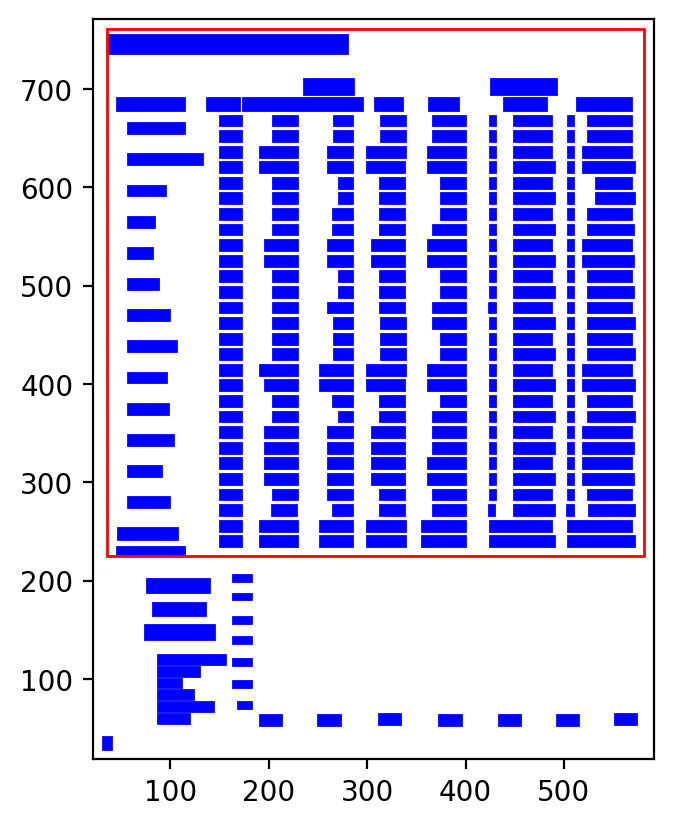

In [54]:
camelot.plot(tables[0], kind='contour').show()

In [55]:
data

,0,1,2,3,4,5,6,7,8,9
0,Winegrap,e Pr,oduct,ion,,,,,,
1,,,,Acreage,,,Pr,oduction,,
2,Red Varieties,Year,Bearing,Non-Bearing,Total,Tons,,$/Ton,,Total Value
3,Cabernet Franc,2007,635.6,58.8,694.4,"2,066.5",$,"2,097.15",$,"4,333,800"
4,,2006,679.1,59.2,738.9,"1,664.9",$,"2,395.21",$,"3,987,700"
5,Cabernet Sauvignon,2007,"11,405.0",688.7,"12,093.7","41,550.6",$,"2,237.73",$,"92,979,100"
6,,2006,"11,527.2",547.4,"12,074.6","38,410.3",$,"2,265.69",$,"87,025,900"
7,Carignane,2007,180.5,0.6,181.1,384.6,$,"1,861.81",$,"716,100"
8,,2006,188.0,1.6,189.6,394.4,$,"1,804.52",$,"711,800"
9,Malbec,2007,252.7,77.3,330.0,837.2,$,"2,487.87",$,"2,082,900"


In [56]:
# drop rows that is not helpful
data = data.drop([0,1,2], axis=0)
data
# for 2011 report, also drop an empty row 

,0,1,2,3,4,5,6,7,8,9
3,Cabernet Franc,2007,635.6,58.8,694.4,"2,066.5",$,"2,097.15",$,"4,333,800"
4,,2006,679.1,59.2,738.9,"1,664.9",$,"2,395.21",$,"3,987,700"
5,Cabernet Sauvignon,2007,"11,405.0",688.7,"12,093.7","41,550.6",$,"2,237.73",$,"92,979,100"
6,,2006,"11,527.2",547.4,"12,074.6","38,410.3",$,"2,265.69",$,"87,025,900"
7,Carignane,2007,180.5,0.6,181.1,384.6,$,"1,861.81",$,"716,100"
8,,2006,188.0,1.6,189.6,394.4,$,"1,804.52",$,"711,800"
9,Malbec,2007,252.7,77.3,330.0,837.2,$,"2,487.87",$,"2,082,900"
10,,2006,241.1,43.3,284.4,"1,393.0",$,"2,483.61",$,"3,459,700"
11,Merlot,2007,"6,206.6",211.8,"6,418.4","21,337.4",$,"1,452.25",$,"30,987,300"
12,,2006,"6,697.4",197.5,"6,894.9","26,015.2",$,"1,529.52",$,"39,790,800"


In [57]:
# special for 2010; $ sign is in its separate column
# rename its column, add the dollar column with the value
data.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


data['7'] = data['6'] + data['7']
data['9'] = data['8'] + data['9']
data = data.drop(['6', '8'], axis=1)
data

,0,1,2,3,4,5,7,9
3,Cabernet Franc,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
4,,2006,679.1,59.2,738.9,"1,664.9","$2,395.21","$3,987,700"
5,Cabernet Sauvignon,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
6,,2006,"11,527.2",547.4,"12,074.6","38,410.3","$2,265.69","$87,025,900"
7,Carignane,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
8,,2006,188.0,1.6,189.6,394.4,"$1,804.52","$711,800"
9,Malbec,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
10,,2006,241.1,43.3,284.4,"1,393.0","$2,483.61","$3,459,700"
11,Merlot,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"
12,,2006,"6,697.4",197.5,"6,894.9","26,015.2","$1,529.52","$39,790,800"


In [58]:
# rename my columns
new_columns = ['Varietal', 'Year', 'Bearing' , 'Non-Bearing', 'Total', 'Tons', '$/Ton', 'Total Value']
data = data.rename(columns=dict(zip(data.columns,new_columns)))
data

,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
4,,2006,679.1,59.2,738.9,"1,664.9","$2,395.21","$3,987,700"
5,Cabernet Sauvignon,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
6,,2006,"11,527.2",547.4,"12,074.6","38,410.3","$2,265.69","$87,025,900"
7,Carignane,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
8,,2006,188.0,1.6,189.6,394.4,"$1,804.52","$711,800"
9,Malbec,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
10,,2006,241.1,43.3,284.4,"1,393.0","$2,483.61","$3,459,700"
11,Merlot,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"
12,,2006,"6,697.4",197.5,"6,894.9","26,015.2","$1,529.52","$39,790,800"


In [59]:

# specific fixes for 2010 

# 28		2010	37,804.4	1,606.3	39,410.7	108,481.0\n(a	) $2,255.85 (a	) $244,717,100
# 29	TOTAL REDS	2009	37,937.2	3,636.2	41,573.4	120,717.0\n(a	) $2,430.05 (a	) $293,348,400				
data.loc[29][0] = data.loc[30][0]
data.loc[30][0] = ''

# data drop empty row
data = data.query("Year != '' and Total != '' and Tons != ''")
data

,Varietal,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
3,Cabernet Franc,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
4,,2006,679.1,59.2,738.9,"1,664.9","$2,395.21","$3,987,700"
5,Cabernet Sauvignon,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
6,,2006,"11,527.2",547.4,"12,074.6","38,410.3","$2,265.69","$87,025,900"
7,Carignane,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
8,,2006,188.0,1.6,189.6,394.4,"$1,804.52","$711,800"
9,Malbec,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
10,,2006,241.1,43.3,284.4,"1,393.0","$2,483.61","$3,459,700"
11,Merlot,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"
12,,2006,"6,697.4",197.5,"6,894.9","26,015.2","$1,529.52","$39,790,800"


In [60]:
data['Varietal'].unique()

array(['Cabernet Franc', '', 'Cabernet Sauvignon', 'Carignane', 'Malbec',
       'Merlot', 'Meunier', 'Petite Sirah', 'Petite Verdot', 'Pinot Noir',
       'Sangiovese', 'Syrah-Shiraz', 'Zinfandel', 'Other Reds',
       'TOTAL REDS'], dtype=object)

In [247]:
# data.loc[data['Varietal'].str.contains('Cabernet'), 'Varietal'] = 'Cabernet Sauvignon'
# data.loc[data['Varietal'].str.contains('Sangiovese/'), 'Varietal'] = 'Sangiovese/Sangioveto'

In [248]:
# data['Varietal'].str.contains('Sangiovese/')

In [61]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [62]:
data['Varietal'] = data['Varietal'].replace('Mataro/', 'Mataro/Mouvedere')
data['Varietal']= data['Varietal'].replace('Cabernet', 'Cabernet Sauvignon')

# for 2016 only 
data['Varietal'] = data['Varietal'].replace('Sangiovese/', 'Sangiovese/Sangioveto')


data['Varietal']= data['Varietal'].replace(['', 'including other reds', 'Mouvedere', 'Mourvedere (a)', 'Sauvignon', 'Sangioveto'], np.nan)
data = data.reset_index(drop=True)

data['Varietal'].unique()

array(['Cabernet Franc', nan, 'Cabernet Sauvignon', 'Carignane', 'Malbec',
       'Merlot', 'Meunier', 'Petite Sirah', 'Petite Verdot', 'Pinot Noir',
       'Sangiovese', 'Syrah-Shiraz', 'Zinfandel', 'Other Reds',
       'TOTAL REDS'], dtype=object)

In [63]:
data['Varietal'] = data['Varietal'].dropna().repeat(2).reset_index(drop=True)
data['County'] = 'Sonoma'

In [64]:
first_column = data.pop('County')
data['Grape Color'] = 'Red'
third_column = data.pop('Grape Color')
data.insert(0, 'County', first_column)
data.insert(2, 'Grape Color', third_column)
data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
1,Sonoma,Cabernet Franc,Red,2006,679.1,59.2,738.9,"1,664.9","$2,395.21","$3,987,700"
2,Sonoma,Cabernet Sauvignon,Red,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
3,Sonoma,Cabernet Sauvignon,Red,2006,"11,527.2",547.4,"12,074.6","38,410.3","$2,265.69","$87,025,900"
4,Sonoma,Carignane,Red,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
5,Sonoma,Carignane,Red,2006,188.0,1.6,189.6,394.4,"$1,804.52","$711,800"
6,Sonoma,Malbec,Red,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
7,Sonoma,Malbec,Red,2006,241.1,43.3,284.4,"1,393.0","$2,483.61","$3,459,700"
8,Sonoma,Merlot,Red,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"
9,Sonoma,Merlot,Red,2006,"6,697.4",197.5,"6,894.9","26,015.2","$1,529.52","$39,790,800"


In [65]:
data['Tons'] 
data['$/Ton']
data['Total Value']

0       $4,333,800
1       $3,987,700
2      $92,979,100
3      $87,025,900
4         $716,100
5         $711,800
6       $2,082,900
7       $3,459,700
8      $30,987,300
9      $39,790,800
10      $1,032,200
11      $1,479,700
12      $5,635,100
13      $4,051,800
14      $1,895,000
15      $1,743,400
16     $83,482,200
17     $96,415,600
18      $1,882,500
19      $2,453,500
20     $17,555,900
21     $15,270,900
22     $34,673,800
23     $38,524,900
24      $5,240,200
25      $3,101,700
26    $282,496,100
27    $298,017,400
Name: Total Value, dtype: object

In [254]:
# data['Total Value'].apply(lambda x: '${}'.format(x) if isinstance(x, str) and not x.startswith('$') else x)

In [66]:
# for 2007 only 

data['Bearing'] = data['Bearing'].str.replace(' ', '.')
data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
data['Total'] = data['Total'].str.replace(' ', '.')

# data['Tons'] = data['Tons'].str.replace(' ', '.')
# data['$/Ton'] = data['$/Ton'].str.replace(' ', '')
# data['Total Value'] = data['Total Value'].str.replace(' ', ',')

# # specific for 2007


# we could do .apply lambda function for all the possible combinations so we don't have to add specificly for each year

data['$/Ton'] = data['$/Ton'].str.replace(' (a)', '', regex=False)
data['Total Value'] = data['Total Value'].apply(lambda x: '$' + x if '$' not in x else x)
data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
1,Sonoma,Cabernet Franc,Red,2006,679.1,59.2,738.9,"1,664.9","$2,395.21","$3,987,700"
2,Sonoma,Cabernet Sauvignon,Red,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
3,Sonoma,Cabernet Sauvignon,Red,2006,"11,527.2",547.4,"12,074.6","38,410.3","$2,265.69","$87,025,900"
4,Sonoma,Carignane,Red,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
5,Sonoma,Carignane,Red,2006,188.0,1.6,189.6,394.4,"$1,804.52","$711,800"
6,Sonoma,Malbec,Red,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
7,Sonoma,Malbec,Red,2006,241.1,43.3,284.4,"1,393.0","$2,483.61","$3,459,700"
8,Sonoma,Merlot,Red,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"
9,Sonoma,Merlot,Red,2006,"6,697.4",197.5,"6,894.9","26,015.2","$1,529.52","$39,790,800"


In [255]:
# # for 2010, 2009, 2008 only 

# data['Bearing'] = data['Bearing'].str.replace(' ', '.')
# data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
# data['Total'] = data['Total'].str.replace(' ', '.')

# # data['Tons'] = data['Tons'].str.replace(' ', '.')
# # data['$/Ton'] = data['$/Ton'].str.replace(' ', '')
# # data['Total Value'] = data['Total Value'].str.replace(' ', ',')

# # # specific for 2010, 2009, 2008
# data['Tons'] = data['Tons'].str.replace('\n(a', '', regex=False)
# # data['$/Ton'] = data['$/Ton'].str.replace('', '0.0', regex=False)

# data['$/Ton'] = data['$/Ton'].str.replace(') ', '', regex=False)
# data['$/Ton'] = data['$/Ton'].str.replace(' (a', '', regex=False)
# data['$/Ton']  = data['$/Ton'].replace('', '$0.0', regex=False)
# data['Total Value'] = data['Total Value'].str.replace(') ', '', regex=False)

# data['Total Value'] = data['Total Value'].apply(lambda x: '$' + x if '$' not in x else x)
# data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2008,638.7,49.9,688.6,"1,594.8","$2,338.83","$3,730,000"
1,Sonoma,Cabernet Franc,Red,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
2,Sonoma,Cabernet Sauvignon,Red,2008,"11,576.0",678.4,"12,254.4","31,870.8","$2,321.51","$73,988,400"
3,Sonoma,Cabernet Sauvignon,Red,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
4,Sonoma,Carignane,Red,2008,181.1,0.0,181.1,327.7,"$1,944.90","$637,400"
5,Sonoma,Carignane,Red,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
6,Sonoma,Malbec,Red,2008,272.0,76.0,348.0,787.6,"$2,550.60","$2,008,900"
7,Sonoma,Malbec,Red,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
8,Sonoma,Merlot,Red,2008,"5,875.6",133.4,"6,009.0","13,298.5","$1,555.48","$20,685,600"
9,Sonoma,Merlot,Red,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"


In [256]:
# data['$/Ton'].replace('', '$0.0', regex=False)

In [257]:
# for 2011 only 

# data['Bearing'] = data['Bearing'].str.replace(' ', '.')
# data['Non-Bearing'] = data['Non-Bearing'].str.replace(' ', '.')
# data['Total'] = data['Total'].str.replace(' ', '.')
# data['Tons'] = data['Tons'].str.replace(' ', '.')
# data['$/Ton'] = data['$/Ton'].str.replace(' ', '')
# # data['Total Value'] = data['Total Value'].str.replace(' ', ',')

# # specific for 2011
# data['Tons'] = data['Tons'].str.replace('*', '', regex=False)
# data['$/Ton'] = data['$/Ton'].str.replace('*', '', regex=False)
# data['Total Value'] = data['Total Value'].str.replace('\n', '', regex=False)
# data['Total Value'] = data['Total Value'].str.replace('(a)  $ ', '$', regex=False)
# data['Total Value'] = data['Total Value'].str.replace('*', '', regex=False)

In [67]:
data

,County,Varietal,Grape Color,Year,Bearing,Non-Bearing,Total,Tons,$/Ton,Total Value
0,Sonoma,Cabernet Franc,Red,2007,635.6,58.8,694.4,"2,066.5","$2,097.15","$4,333,800"
1,Sonoma,Cabernet Franc,Red,2006,679.1,59.2,738.9,"1,664.9","$2,395.21","$3,987,700"
2,Sonoma,Cabernet Sauvignon,Red,2007,"11,405.0",688.7,"12,093.7","41,550.6","$2,237.73","$92,979,100"
3,Sonoma,Cabernet Sauvignon,Red,2006,"11,527.2",547.4,"12,074.6","38,410.3","$2,265.69","$87,025,900"
4,Sonoma,Carignane,Red,2007,180.5,0.6,181.1,384.6,"$1,861.81","$716,100"
5,Sonoma,Carignane,Red,2006,188.0,1.6,189.6,394.4,"$1,804.52","$711,800"
6,Sonoma,Malbec,Red,2007,252.7,77.3,330.0,837.2,"$2,487.87","$2,082,900"
7,Sonoma,Malbec,Red,2006,241.1,43.3,284.4,"1,393.0","$2,483.61","$3,459,700"
8,Sonoma,Merlot,Red,2007,"6,206.6",211.8,"6,418.4","21,337.4","$1,452.25","$30,987,300"
9,Sonoma,Merlot,Red,2006,"6,697.4",197.5,"6,894.9","26,015.2","$1,529.52","$39,790,800"


In [31]:
# for 2016 only 

# data['Bearing'].str.replace(' .', '.', regex=False)
# data['Bearing'].str.replace('--', '0.0', regex=False)
# data['Non-Bearing'].str.replace(' .', '.', regex=False)
# data['Non-Bearing'].str.replace('--', '0.0', regex=False)

# data['Total'].str.replace(' .', '.', regex=False)
# data['Total'].str.replace('--', '0.0', regex=False)
# data['$/Ton'].str.replace(' .', '.', regex=False)
# data['Total Value'].str.replace(' ', ',')

In [852]:
len(data)

28

In [46]:
data.to_csv('example.csv', index=False, encoding='utf-8')

In [156]:
# data['Varietal'] = data['Varietal'].replace('', method='ffill')
# data